In [1]:
# Libraries for text preprocessing
import re
import nltk
#nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import RegexpTokenizer
#nltk.download('wordnet') 
from nltk.stem.wordnet import WordNetLemmatizer
import pandas as pd

In [77]:
df = pd.read_excel('/Users/Suwani/Desktop/Moodys Project/Cleaned data/oct18_cleaned.xlsx')

In [78]:
#Fetch wordcount for each abstract
df['word_count'] = df['Headline'].apply(lambda x: len(str(x).split(" ")))
df[['Headline','word_count']].head()

,Headline,word_count
0,Sri Lankan Rupee falls to 176.52 against the U...,10
1,Sri Lankan rupee hits record low of 175.56,8
2,Sri Lankan rupee down to record low amidst pol...,10
3,International community reacts to situation in...,8
4,India monitoring political crisis in Sri Lanka,7


In [79]:
a = df.index[-1]

In [80]:
a

1082

In [81]:
##Descriptive statistics of word counts
df.word_count.describe()

count    1083.000000
mean        7.257618
std         2.576577
min         1.000000
25%         5.000000
50%         7.000000
75%         9.000000
max        19.000000
Name: word_count, dtype: float64

In [82]:
#Identify common words
freq = pd.Series(' '.join(df['Headline']).split()).value_counts()[:20]
freq

to          218
in          189
Sri         158
Lanka       122
for         115
of          112
at           76
the          73
on           66
-            66
and          64
a            52
with         42
Lankan       42
2018         30
wins         29
Minister     25
Lanka’s      24
as           23
–            23
dtype: int64

In [83]:
#Identify uncommon words
freq1 =  pd.Series(' '.join(df 
         ['Headline']).split()).value_counts()[-20:]
freq1

hunt          1
Growth        1
Face          1
honeymoon     1
place         1
Ruhuna        1
toothpaste    1
Pelwatte      1
4V            1
DECIDE        1
WFP           1
AGAINST       1
8             1
if            1
Frigi         1
additional    1
reaches       1
president     1
Suspect       1
IFS           1
dtype: int64

In [84]:
##Creating a list of stop words and adding custom stopwords
stop_words = set(stopwords.words("english"))
##Creating a list of custom stopwords
new_words = ["using", "show", "result", "large", "also", "iv", "one", "two", "new", "previously", "shown","sri","lanka","lankan"]
stop_words = stop_words.union(new_words)

In [85]:
corpus = []
for i in range(0, a+1):
    #Remove punctuations
    text = re.sub('[^a-zA-Z]', ' ', df['Headline'][i])
    
    #Convert to lowercase
    text = text.lower()
    
    #remove tags
    text=re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",text)
    
    # remove special characters and digits
    text=re.sub("(\\d|\\W)+"," ",text)
    
    ##Convert to list from string
    text = text.split()
    
    ##Stemming
    ps=PorterStemmer()
    #Lemmatisation
    lem = WordNetLemmatizer()
    text = [lem.lemmatize(word) for word in text if not word in  
            stop_words] 
    text = " ".join(text)
    corpus.append(text)

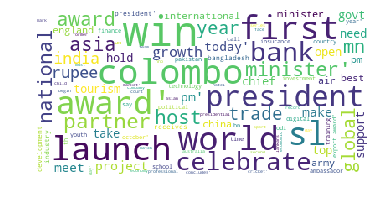

In [86]:
#Word cloud
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
%matplotlib inline
wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stop_words,
                          max_words=100,
                          max_font_size=50, 
                          random_state=42
                         ).generate(str(corpus))
print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
fig.savefig("word1.png", dpi=900)

In [87]:
from sklearn.feature_extraction.text import CountVectorizer
import re
cv=CountVectorizer(max_df=0.8,stop_words=stop_words, max_features=10000, ngram_range=(1,3))
X=cv.fit_transform(corpus)

In [88]:
list(cv.vocabulary_.keys())[:10]

['rupee',
 'fall',
 'dollar',
 'rupee fall',
 'fall dollar',
 'rupee fall dollar',
 'hit',
 'record',
 'low',
 'rupee hit']

### Visualize top N uni-grams, bi-grams & tri-grams

[Text(0, 0, 'win'),
 Text(0, 0, 'award'),
 Text(0, 0, 'president'),
 Text(0, 0, 'minister'),
 Text(0, 0, 'sl'),
 Text(0, 0, 'colombo'),
 Text(0, 0, 'bank'),
 Text(0, 0, 'world'),
 Text(0, 0, 'launch'),
 Text(0, 0, 'first'),
 Text(0, 0, 'pm'),
 Text(0, 0, 'year'),
 Text(0, 0, 'day'),
 Text(0, 0, 'export'),
 Text(0, 0, 'asia'),
 Text(0, 0, 'partner'),
 Text(0, 0, 'england'),
 Text(0, 0, 'indian'),
 Text(0, 0, 'project'),
 Text(0, 0, 'trade')]

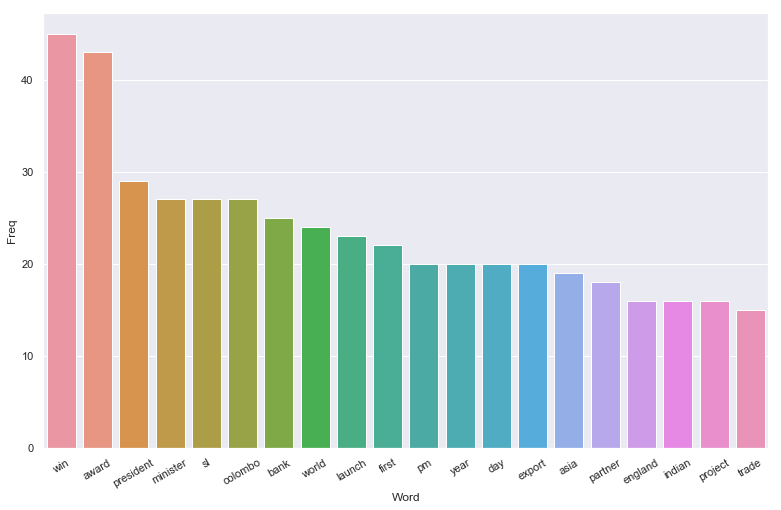

In [89]:
#Most frequently occuring words
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in      
                   vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                       reverse=True)
    return words_freq[:n]
#Convert most freq words to dataframe for plotting bar plot
top_words = get_top_n_words(corpus, n=20)
top_df = pd.DataFrame(top_words)
top_df.columns=["Word", "Freq"]
#Barplot of most freq words
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
g = sns.barplot(x="Word", y="Freq", data=top_df)
g.set_xticklabels(g.get_xticklabels(), rotation=30)

                Bi-gram  Freq
0          indian ocean    11
1          export award    10
2             child day     7
3            nce export     6
4           england win     5
5            south asia     5
6        prime minister     5
7          nalin perera     4
8          assumes duty     4
9         chief justice     4
10             sign mou     4
11          people bank     4
12       th anniversary     4
13      anti corruption     4
14       outlook stable     4
15  business excellence     4
16        fixed support     4
17          world child     4
18        human capital     3
19           world bank     3


[Text(0, 0, 'indian ocean'),
 Text(0, 0, 'export award'),
 Text(0, 0, 'child day'),
 Text(0, 0, 'nce export'),
 Text(0, 0, 'england win'),
 Text(0, 0, 'south asia'),
 Text(0, 0, 'prime minister'),
 Text(0, 0, 'nalin perera'),
 Text(0, 0, 'assumes duty'),
 Text(0, 0, 'chief justice'),
 Text(0, 0, 'sign mou'),
 Text(0, 0, 'people bank'),
 Text(0, 0, 'th anniversary'),
 Text(0, 0, 'anti corruption'),
 Text(0, 0, 'outlook stable'),
 Text(0, 0, 'business excellence'),
 Text(0, 0, 'fixed support'),
 Text(0, 0, 'world child'),
 Text(0, 0, 'human capital'),
 Text(0, 0, 'world bank')]

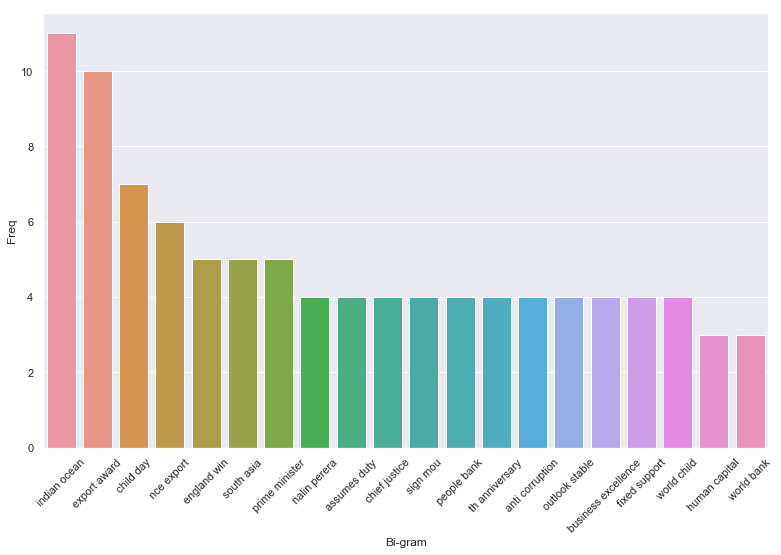

In [90]:
#Most frequently occuring Bi-grams
def get_top_n2_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(2,2),  
            max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]
top2_words = get_top_n2_words(corpus, n=20)
top2_df = pd.DataFrame(top2_words)
top2_df.columns=["Bi-gram", "Freq"]
print(top2_df)
#Barplot of most freq Bi-grams
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
h=sns.barplot(x="Bi-gram", y="Freq", data=top2_df)
h.set_xticklabels(h.get_xticklabels(), rotation=45)

                      Tri-gram  Freq
0             nce export award     6
1        boat boating festival     3
2    celebrates th anniversary     3
3    softlogic delifrance chef     3
4          colombo city centre     3
5               rupee time low     2
6  depreciating rupee avoiding     2
7         rupee avoiding money     2
8            avoiding money go     2
9               money go round     2


[Text(0, 0, 'nce export award'),
 Text(0, 0, 'boat boating festival'),
 Text(0, 0, 'celebrates th anniversary'),
 Text(0, 0, 'softlogic delifrance chef'),
 Text(0, 0, 'colombo city centre'),
 Text(0, 0, 'rupee time low'),
 Text(0, 0, 'depreciating rupee avoiding'),
 Text(0, 0, 'rupee avoiding money'),
 Text(0, 0, 'avoiding money go'),
 Text(0, 0, 'money go round')]

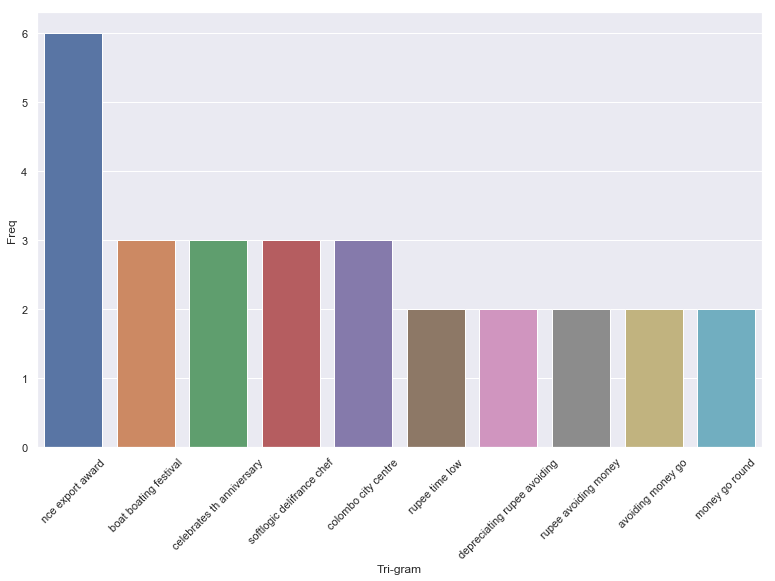

In [91]:
#Most frequently occuring Tri-grams
def get_top_n3_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(3,3), 
           max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]
top3_words = get_top_n3_words(corpus, n=10)
top3_df = pd.DataFrame(top3_words)
top3_df.columns=["Tri-gram", "Freq"]
print(top3_df)
#Barplot of most freq Tri-grams
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
j=sns.barplot(x="Tri-gram", y="Freq", data=top3_df)
j.set_xticklabels(j.get_xticklabels(), rotation=45)

### Converting to a matrix of integers

In [92]:
from sklearn.feature_extraction.text import TfidfTransformer
 
tfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=True)
tfidf_transformer.fit(X)
# get feature names
feature_names=cv.get_feature_names()
 
# fetch document for which keywords needs to be extracted
doc=corpus[0]
 
#generate tf-idf for the given document
tf_idf_vector=tfidf_transformer.transform(cv.transform([doc]))

In [93]:
#Function for sorting tf_idf in descending order
from scipy.sparse import coo_matrix
def sort_coo(coo_matrix):
    tuples = zip(coo_matrix.col, coo_matrix.data)
    return sorted(tuples, key=lambda x: (x[1], x[0]), reverse=True)
 
def extract_topn_from_vector(feature_names, sorted_items, topn=10):
    """get the feature names and tf-idf score of top n items"""
    
    #use only topn items from vector
    sorted_items = sorted_items[:topn]
 
    score_vals = []
    feature_vals = []
    
    # word index and corresponding tf-idf score
    for idx, score in sorted_items:
        
        #keep track of feature name and its corresponding score
        score_vals.append(round(score, 3))
        feature_vals.append(feature_names[idx])
 
    #create a tuples of feature,score
    #results = zip(feature_vals,score_vals)
    results= {}
    for idx in range(len(feature_vals)):
        results[feature_vals[idx]]=score_vals[idx]
    
    return results
#sort the tf-idf vectors by descending order of scores
sorted_items=sort_coo(tf_idf_vector.tocoo())
#extract only the top n; n here is 10
keywords=extract_topn_from_vector(feature_names,sorted_items,5)
 
# now print the results
print("\nAbstract:")
print(doc)
print("\nKeywords:")
for k in keywords:
    print(k,keywords[k])



Abstract:
rupee fall u dollar

Keywords:
rupee fall dollar 0.429
rupee fall 0.429
fall dollar 0.429
fall 0.429
dollar 0.405


In [94]:
corpus[0]

'rupee fall u dollar'